In [1]:
# Importing all libraries

import zipfile
import tensorflow as tf
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

# Creating directory as kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Fetching the dogs-vs-cats dataset using Kaggle API
!kaggle datasets download -d salader/dogs-vs-cats

# Unzipping the data and putting into directory for both classes

zip_f = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_f.extractall('/content')
zip_f.close()

100% 1.06G/1.06G [00:11<00:00, 40.0MB/s]
100% 1.06G/1.06G [00:11<00:00, 98.9MB/s]


In [2]:
# Creating dataset generator for smooth processing

train_data = keras.utils.image_dataset_from_directory(directory = '/content/train',
                                                      labels = 'inferred',
                                                      label_mode = 'int',
                                                      batch_size = 32,
                                                      image_size = (256, 256))

valid_data = keras.utils.image_dataset_from_directory(directory = '/content/test',
                                                      labels = 'inferred',
                                                      label_mode = 'int',
                                                      batch_size = 32,
                                                      image_size = (256, 256))

# Normalising the image for better processing

def Normalize_image(img, lab):

    # Casting the image into float (0-1) for better processing

    img = tf.cast(img/255.0, dtype = tf.float32)

    return img, lab

# Applying the function on both dataset
train_data = train_data.map(Normalize_image)

valid_data = valid_data.map(Normalize_image)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [3]:
# Creating the architecture of the model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

# Compiling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [4]:
# Fitting model on the dataset

model.fit(train_data, epochs = 12, validation_data= valid_data)

# Saving the model

model.save('cat_dog_classifier')

Epoch 1/12
625/625 [==============================] - 76s 106ms/step - loss: 1.6112 - accuracy: 0.5570 - val_loss: 0.6478 - val_accuracy: 0.6062
Epoch 2/12
625/625 [==============================] - 66s 105ms/step - loss: 0.6628 - accuracy: 0.6178 - val_loss: 0.6586 - val_accuracy: 0.6352
Epoch 3/12
625/625 [==============================] - 66s 105ms/step - loss: 0.6092 - accuracy: 0.6719 - val_loss: 0.5802 - val_accuracy: 0.7126
Epoch 4/12
625/625 [==============================] - 64s 103ms/step - loss: 0.5577 - accuracy: 0.7263 - val_loss: 0.5630 - val_accuracy: 0.7212
Epoch 5/12
625/625 [==============================] - 63s 99ms/step - loss: 0.5365 - accuracy: 0.7463 - val_loss: 0.4860 - val_accuracy: 0.7890
Epoch 6/12
625/625 [==============================] - 66s 105ms/step - loss: 0.4949 - accuracy: 0.7736 - val_loss: 0.5072 - val_accuracy: 0.7724
Epoch 7/12
625/625 [==============================] - 63s 100ms/step - loss: 0.4653 - accuracy: 0.7941 - val_loss: 0.5048 - val_acc

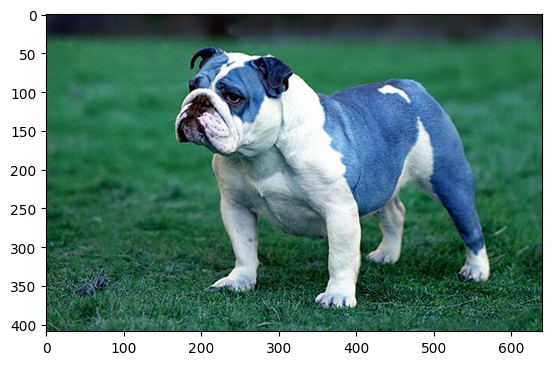

In [7]:
# Predicting test unknown images of cat and dog

def prediction_func(test_input):

    pred_img = model.predict(test_input)

    if pred_img[0][0] == 1:

        return 'Dog'
    else:
        return 'Cat'

import cv2
import matplotlib.pyplot as plt

test_img = cv2.imread('test 1.jpg')

test_input = cv2.resize(test_img, dsize = (256, 256))

test_input = test_input.reshape((1,256, 256,3))

plt.imshow(test_img) # So it is a dog

In [8]:
# Prediction

print(f'So, the image is of a {prediction_func(test_input)}')

1/1 [==============================] - 0s 369ms/step
So, the image is of a Dog


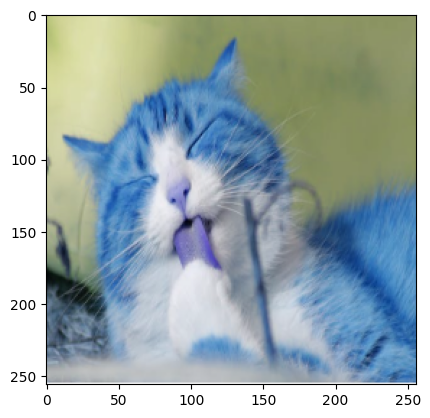

In [11]:
# Second image processing

test_img_2 = cv2.imread('test 2.png')
test_img_2 = cv2.resize(test_img_2, dsize = (256, 256))

test_input_2 = test_img_2.reshape((1, 256, 256, 3))
plt.imshow(test_img_2) # so it is a cat

In [12]:
# Prediction

print(f'So, the image is of a {prediction_func(test_input_2)}')

1/1 [==============================] - 0s 22ms/step
So, the image is of a Cat
